# Data Science Bootcamp project

## Libraries

In [77]:
import numpy as np
import pandas as pd
import re
from bootcampviztools import*
from scipy.stats import chi2_contingency, mannwhitneyu
from Functions import*
from sklearn.impute import SimpleImputer

# Imputar valores nulos (si los hay). i.e. serumcholestrol
imputer = SimpleImputer(strategy='mean')

## Data exploration

This is an initial exploration of the data visualizing the table, displaying general information, describing the numerical variables and listing the columns.

In [78]:
df_cardiovascular = pd.read_csv("Cardiovascular_Disease_Dataset/Cardiovascular_Disease_Dataset.csv")

In [202]:
df = df_cardiovascular.copy()

In [80]:
df.head(10)

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1
5,148462,24,1,1,173,0,0,0,161,0,4.7,3,2,1
6,168686,79,1,2,130,240,0,2,157,0,2.5,2,1,1
7,170498,52,1,0,127,345,0,0,192,1,4.9,1,0,0
8,188225,62,1,0,121,357,0,1,138,0,2.8,0,0,0
9,192523,61,0,0,190,181,0,1,150,0,2.9,2,0,1


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


There are no null rows.

In [82]:
df.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


Next, we will check if there are duplicate rows in the data.

In [83]:
print(df.duplicated().sum())
df[df.duplicated()]

0


,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target


Is possible to confirm that there are no duplicate rows.

## Data cleaning

After this first analysis, we have created the function check_feature_values which verifies each feature against the allowed values and data types specified in the table of the business requirements.

In [84]:
# Function to verify all the values in the features
def check_all_features(df):
    validation_results = check_feature_values(df) 
    
    for feature, result in validation_results.items():
        if result['Valid']:
            print(f"Feature '{feature}' has expected values: {result['Description']}")
        else:
            print(f"Feature '{feature}' has UNEXPECTED values: {result['Description']}")

In [85]:
# Verification of the features
check_all_features(df)

Feature 'patientid' has expected values: Number (Numeric)
Feature 'age' has expected values: In Years (Numeric)
Feature 'gender' has expected values: 1,0 (0 = female, 1 = male) (Binary)
Feature 'chestpain' has expected values: 0,1,2,3 (0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic) (Nominal)
Feature 'restingBP' has expected values: 94-200 (in mm Hg) (Numeric)
Feature 'serumcholestrol' has UNEXPECTED values: 126-564 (in mg/dl) (Numeric)
Feature 'fastingbloodsugar' has expected values: 0,1 > 120 mg/dl (0 = false, 1 = true) (Binary)
Feature 'restingrelectro' has expected values: 0,1,2 (0: normal, 1: ST-T wave abnormality, 2: probable or definite left ventricular hypertrophy) (Nominal)
Feature 'maxheartrate' has expected values: 71-202 (Numeric)
Feature 'exerciseangia' has expected values: 0,1 (0 = no, 1 = yes) (Binary)
Feature 'oldpeak' has expected values: 0-6.2 (Numeric)
Feature 'slope' has UNEXPECTED values: 1,2,3 (1: upsloping, 2: flat, 3: downsloping) (N

All the features have expected values except 'serumcholestrol' and 'slope'. 
Next, we will check which are the unexpected values.

### Feature 'serumcholesterol'
The values of this column should be between 126 and 564 as per the table of definitions. We will create a df with those rows that not accomplish the serumcholesterol given.

In [86]:
def filtrar_serumcholestrol(df):
    # Filtering the rows where serumcholesterol is less than 126 and more than 564 mg/dl. 
    filtrado = df[(df['serumcholestrol'] < 126) | (df['serumcholestrol'] > 564)]
    return filtrado

In [87]:
serum_diff = filtrar_serumcholestrol(df)

In [88]:
serum_diff

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1
5,148462,24,1,1,173,0,0,0,161,0,4.7,3,2,1
15,235344,32,1,2,188,0,0,0,134,1,4.5,2,3,1
27,407924,42,1,0,157,0,0,2,196,0,4.2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,9497570,46,1,2,162,0,0,2,135,1,1.3,3,1,1
968,9668804,66,0,1,197,0,0,1,196,1,2.6,2,2,1
972,9694500,54,1,2,176,0,0,2,176,0,6.1,2,1,1
980,9782088,46,1,2,147,0,0,0,159,1,3.2,2,1,1


There are a total of 65 patients out of the ranges given. 

Before deciding how to handle these values, it is crucial to understand why these patients have this serum cholesterol level. It could be the result of a specific treatment, a particular medical condition, or simply an error in measurement. 

The normally accepted range for serum cholesterol is generally between 126 to 200 mg/dl for adults. However, the specific range may vary depending on the patient.

In [89]:
grouped = serum_diff.groupby(['target', 'serumcholestrol']).size().reset_index(name='count')
grouped

,target,serumcholestrol,count
0,1,0,53
1,1,85,1
2,1,86,4
3,1,87,2
4,1,601,3
5,1,602,2


(2,)


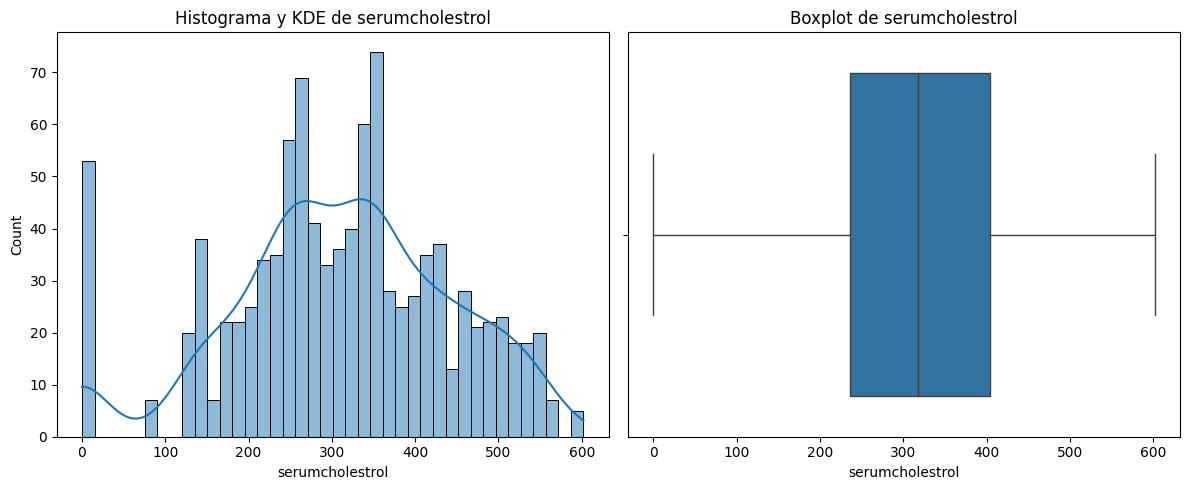

In [90]:
plot_combined_graphs(df, ['serumcholestrol'], whisker_width=2, bins = 40)

If we have conducted an analysis using histograms and box plots and have not identified outliers in the data for serum cholesterol, it is reasonable to retain these values in our original dataset. This suggests that 0, 85, 86, 87, 601, 602 mg/dl values are not exceptional in our sample and may reflect a valid scenario within the context of our study.

There are no specific reasons to impute other values.

### Feature 'slope'

The values of the feature 'slope' should be 1, 2 or 3. (1: upsloping, 2: flat, 3: downsloping).
Next, we filter for those values that are different from 1, 2 or 3.

In [91]:
def filtrar_slope(df):
    # Filtering the rows that slope is different than 1, 2 or 3.
    filtrado = df[(df['slope'] != 1) & (df['slope'] != 2) & (df['slope'] != 3)]
    return filtrado

In [92]:
slope_diff = filtrar_slope(df)

In [93]:
slope_diff

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
8,188225,62,1,0,121,357,0,1,138,0,2.8,0,0,0
12,223295,27,1,0,129,135,0,1,192,1,1.0,0,0,0
19,260870,35,1,0,127,269,0,0,87,1,3.8,0,1,0
25,390931,71,1,1,101,352,0,1,183,0,3.6,0,0,0
26,390988,46,1,0,198,253,0,0,199,1,2.1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,9736370,65,1,0,125,346,0,1,93,1,3.9,0,0,0
988,9870657,74,1,0,136,279,0,1,122,0,1.2,0,0,0
991,9896438,24,1,0,170,354,0,0,90,1,1.5,0,0,0
994,9937998,62,1,1,125,342,0,0,128,1,2.1,0,0,0


In [94]:
grouped_slope = slope_diff.groupby(['target', 'slope']).size().reset_index(name='count')

In [95]:
grouped_slope

,target,slope,count
0,0,0,180


Having 180 rows with slope = 0 represents the 18% of the dataset, and the changes made on this feature can affect the representativeness of the sample. It's important to assess why slope has incorrect values and whether these are clearly data entry errors or indicative of something more complex that requires further investigation.

Instead of deleting these values, we will analyze which slope values should be for these 180 rows using a machine learning model.

In [176]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay



In [137]:
def filtrar_slope_wo_zeros(df):
    # Filtering the rows that slope is different than 0
    filtrado = df[(df['slope'] != 0)]
    return filtrado

In [138]:
slope_wo_zeros = filtrar_slope_wo_zeros(df)

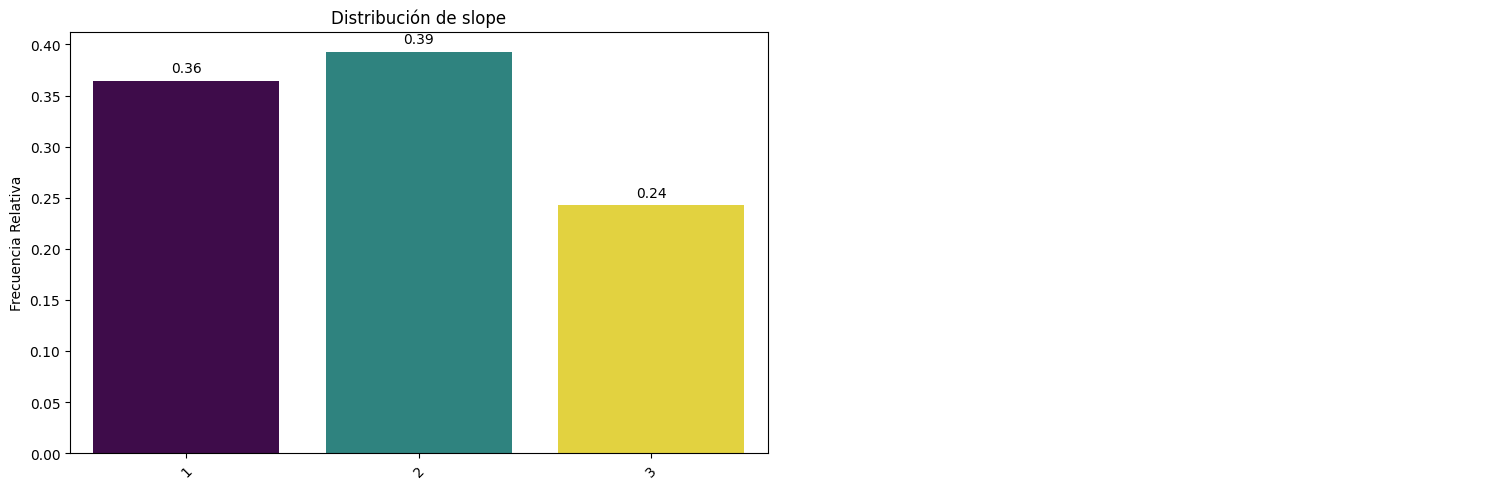

In [139]:
pinta_distribucion_categoricas(slope_wo_zeros, ['slope'],relativa= True, mostrar_valores= True)

In those rows of the dataset that are slope different than 0 (a total of 820 rows), we can see that we have an amount of 36% of slope = 1, a 39% of slope = 2 and 24% of slope = 3.
Therefore, it's a good idea to do a pipeline because this is a classification problem with a target that has multiple classes. The proportion or frequencies are relatively balanced. 

In [182]:
X = slope_wo_zeros[['age', 'gender', 'chestpain', 'restingBP',
       'serumcholestrol', 'fastingbloodsugar', 'restingrelectro',
       'maxheartrate', 'exerciseangia', 'oldpeak', 'noofmajorvessels',
       'target']]
y = slope_wo_zeros['slope']

We don't need to preprocess the features as all of them are numerical or are label encoded in the initial dataset.

We will use the Random Forest model, as it has a good performance on a variety of datasets, robust against overfitting and handles imbalanced datasets well, and also can handle numerical and categorically encoded features using LabelEncoder. 

To achieve the best performance and a robust evaluation, we will do the following tasks:

Initial Split and Hyperparameter Search:
- Split the data into X_train, X_test, y_train, and y_test.
- Use GridSearchCV on X_train and y_train to find the best hyperparameters.

Retraining with All Data and Final Evaluation:
- Retrain the model with the best hyperparameters using all the data (X and y).
- Evaluate the final model using cross-validation to obtain a robust estimate of its performance.

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [175]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    "n_estimators": [100,200,400],
    "max_depth": [1,5,10,None],
    "min_samples_leaf": [1,10,20,100],
    "class_weight": ["balanced",None],
    "max_features": ["sqrt","log2",None]
}

rf_grid = GridSearchCV(rf_model,
                       param_grid= param_grid,
                       cv = 5,
                       scoring= "balanced_accuracy")

rf_grid.fit(X_train,y_train)

# Obtener el mejor modelo encontrado
best_rf_model = rf_grid.best_estimator_

# Imprimir los mejores hiperparámetros encontrados
print(f'Best hyperparameters: {rf_grid.best_params_}')

# Evaluar el mejor modelo en el conjunto de prueba
y_pred_best = best_rf_model.predict(X_test)
print(classification_report(y_test, y_pred_best))

Best hyperparameters: {'class_weight': 'balanced', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 100}
              precision    recall  f1-score   support

           1       0.93      0.83      0.87        63
           2       0.64      0.62      0.63        63
           3       0.40      0.50      0.45        38

    accuracy                           0.67       164
   macro avg       0.66      0.65      0.65       164
weighted avg       0.70      0.67      0.68       164



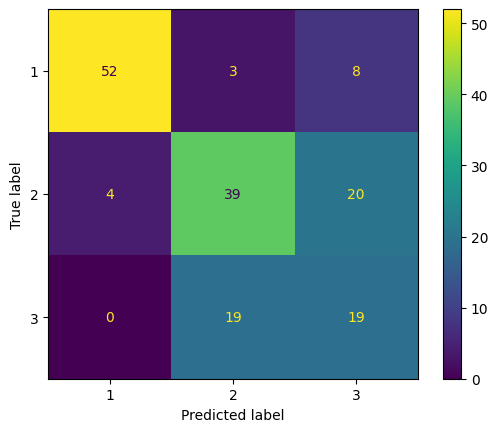

In [177]:
ConfusionMatrixDisplay.from_estimator(best_rf_model, X_test, y_test)
plt.show()

The model has an overall accuracy of 0.67, meaning that 67% of the predictions were correct.
- Class 1 has good precision and recall, indicating that the model is quite effective in predicting this class.
- Class 2 has moderate precision and recall.
- Class 3 has relatively low performance in terms of precision and recall.

Once we have calculated the best hyperparameters, we will use all of the rows available in our dataset to calculate the Random Forest Classifier Model.

In [183]:
# Mejores hiperparámetros encontrados
best_params = rf_grid.best_params_

In [184]:
# Final model
final_rf_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf'],
    class_weight=best_params['class_weight'],
    max_features=best_params['max_features'],
    random_state=42
)

# Train final model 
final_rf_model.fit(X, y)

# Evaluation of the final model
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(final_rf_model, X, y, cv=5, scoring='balanced_accuracy')
print(f'Cross-validated scores: {cv_scores}')
print(f'Mean cross-validated score: {cv_scores.mean()}')


Cross-validated scores: [0.56215278 0.66041667 0.58784722 0.61365711 0.63247863]
Mean cross-validated score: 0.6113104809503115


Now we will read all the rows of the dataframe, will aply the Machine Learning model in those rows where slope = 0, and substitute the value of slope for the value predicted by the model. 

In [189]:
#Values used for the predictions
feature_columns = ['age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol',
                   'fastingbloodsugar', 'restingrelectro', 'maxheartrate',
                   'exerciseangia', 'oldpeak', 'noofmajorvessels', 'target']

In [191]:
# Function to apply the model and substitute slope
def update_slope(df, model):
    for index, row in df.iterrows():
        if row['slope'] == 0:
            # Extraction of necessary characteristics
            features = pd.DataFrame([row[feature_columns]], columns=feature_columns)
            # Prediction of slope
            predicted_slope = model.predict(features)[0]
            # Substituition of the slope
            df.at[index, 'slope'] = predicted_slope
    return df

In [203]:
df_cleaned = df.copy()

In [204]:
#Applying the function
df_cleaned = update_slope(df_cleaned, final_rf_model)

Now, if we review the final plot:

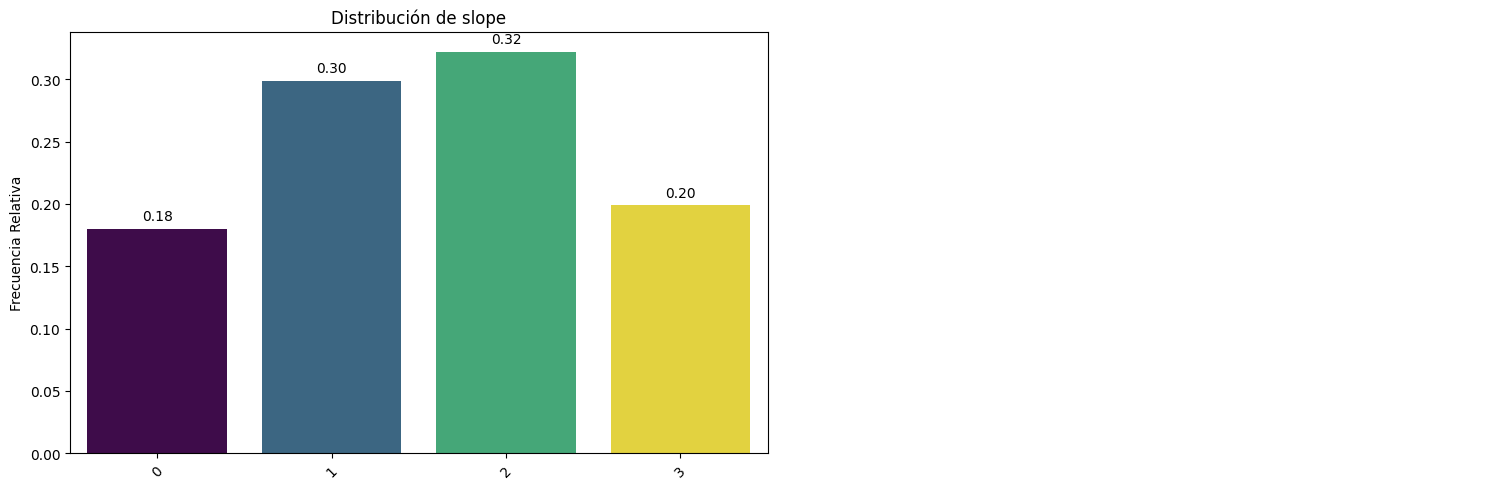

In [208]:
pinta_distribucion_categoricas(df, ['slope'],relativa= True, mostrar_valores= True)

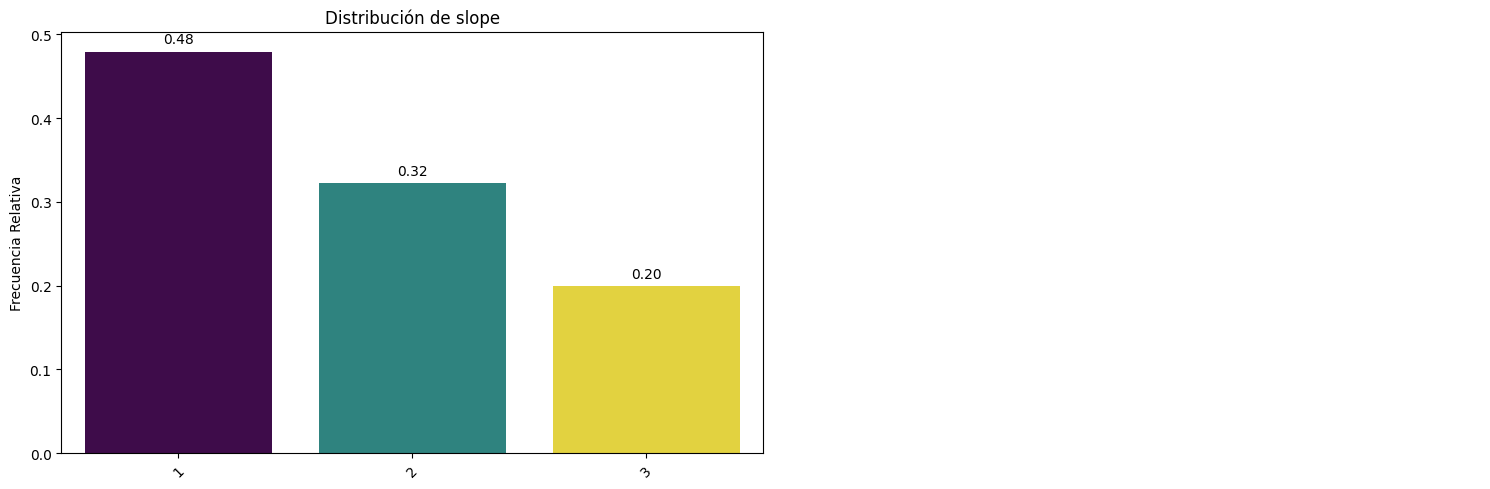

In [193]:
pinta_distribucion_categoricas(df_cleaned, ['slope'],relativa= True, mostrar_valores= True)

In [205]:
df.slope.value_counts()

slope
2    322
1    299
3    199
0    180
Name: count, dtype: int64

In [206]:
df_cleaned.slope.value_counts()

slope
1    479
2    322
3    199
Name: count, dtype: int64

Comparing between dataframes (initial ones, df, and latest ones, df_cleaned), we can see that all of the 180 values have been transformed to 1's. 

Later, in the Machine Learning model of all the dataset, we can see that the model has good f1-score and accuracy in two cases:
- In case we decide to drop the 180 rows that are slope = 0.
- In case we decide to transform the 180 rows to another value.

Therefore, we choose to continue with the second option, maintain all the rows in the system and do the corresponding transformations. 
And we will create a new file to store it.

In [209]:
df_cleaned.to_csv('Cardiovascular_Disease_Dataset/Cardiovascular_Disease_Dataset_cleaned.csv', index=False)